In [105]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from __future__ import division

In [106]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\Jitesh\\yogesh\\Projects\\USAelection2016\\general_election.csv",encoding="Latin-1")

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null int64
Clinton                   1522 non-null int64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(3), int64(3), object(11)
memory usage: 202.2+ KB


In [108]:
data.shape

(1522, 17)

In [109]:
data.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41,45,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6,89,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82,7,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38,43,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,04-11-2016,07-11-2016,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43,41,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


# Who was being polled and what was their party affiliation?

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


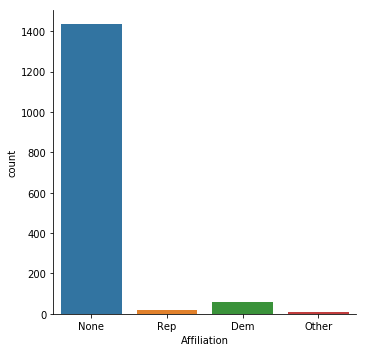

In [110]:
sns.factorplot("Affiliation",data=data,kind='count')

In [111]:
#Most of the polls has no affiliation but there is stronger democratic polls then republic.

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


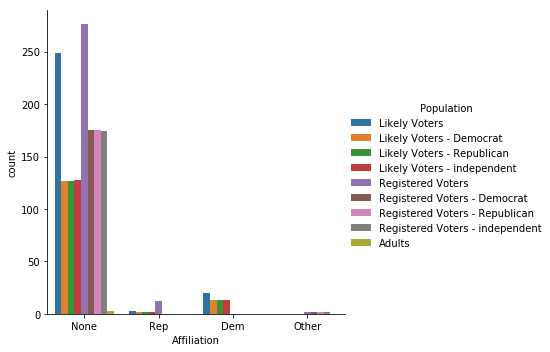

In [112]:
sns.factorplot("Affiliation",data=data,hue='Population',kind='count')

In [113]:
# So there is a strong sample of registered voters that are not affiliated ,I think polls data give good representation of 
# upcoming election

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


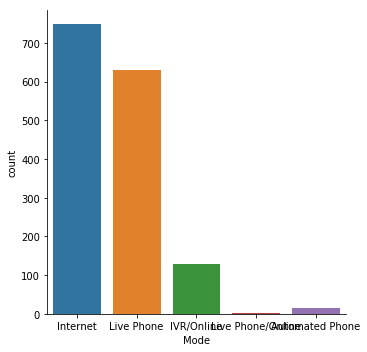

In [114]:
sns.factorplot("Mode",data=data,kind="count")

# Did polls result in favour of clinton and Trump ?

In [115]:
avg=pd.DataFrame(data.mean())
avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)
avg

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [116]:
std=pd.DataFrame(data.std())
std.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)
std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


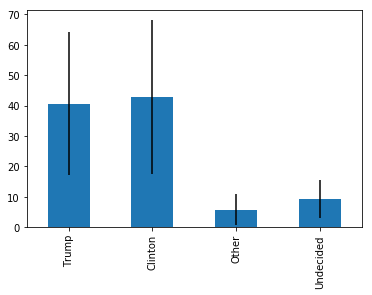

In [117]:
avg.plot(yerr=std,kind='bar',legend=False)

In [118]:
# I think race between Trump and clinton really close,with result in favour of clinton than for trump.

In [119]:
polls_avg=pd.concat([avg,std],axis=1)
polls_avg.collumns=['Mean','Standard_deviation']
polls_avg

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0,0
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [120]:
# This data also shows that results are very close,clinton is head with smaller margin

# How did voter sentiment change over time?

In [121]:
from datetime import datetime
data['difference']=(data.Clinton-data.Trump)/100
data.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,difference
0,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41,45,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6,89,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82,7,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,04-11-2016,07-11-2016,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38,43,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,04-11-2016,07-11-2016,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43,41,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


In [122]:
# In difference section a positive difference indicate clinton win and negative indicates Trump wins

In [123]:
# now lets group the data based on start date
polls_data=data.groupby(['Start Date'],as_index=False).mean()
polls_data.tail()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,difference
262,31-05-2016,553.00,39.222222,40.00,9.444444,7.555556,1.444444,0.007778
263,31-07-2015,3477.00,49.000000,50.00,NaN,NaN,1.000000,0.010000
264,31-07-2016,911.00,38.200000,43.40,4.900000,7.100000,1.500000,0.052000
265,31-08-2016,488.25,43.500000,42.25,3.000000,3.250000,1.000000,-0.012500
266,31-10-2016,30546.60,45.200000,48.60,3.333333,3.333333,1.400000,0.034000


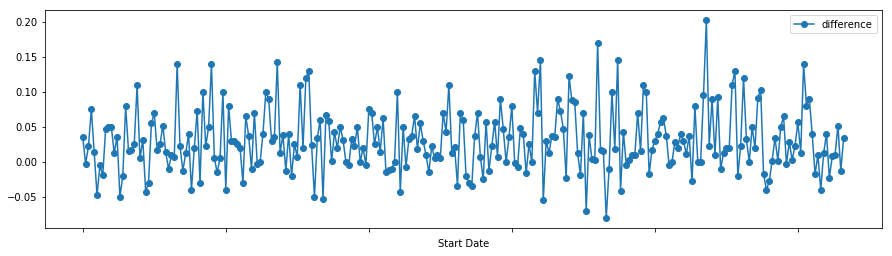

In [124]:
polls_data.plot('Start Date','difference',figsize=(15,4),marker='o',linestyle='-')

In [125]:
# The visualisation indicates that Trump has a slight lead in the polls, on average. Keep in mind that this is without 
# accounting for the weights of different polls, demographics, and affiliations of the population polled.

# Can we see an effect in the polls from the debates?

In [132]:
# Another interesting thing that we can look into, is what happened on the days leading up to the first debate, and 
# afterwards. We know that the debate was on 26-September-2016, so we'll plot the trends for the month of September.

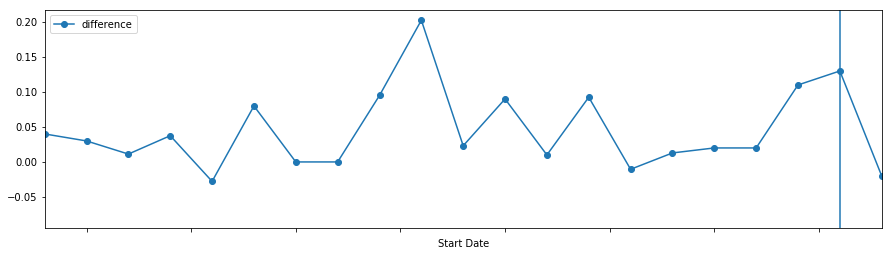

In [141]:
polls_data.plot('Start Date','difference',figsize=(15,4),marker='o',linestyle='-',xlim=(209,229))
plt.axvline(x=228)

In [135]:
# And what it looks like, is that the sentiment shifted slightly in favour of Trump, after the debate. Again, 
# it's important to keep in mind that we're dealing with averages